# Parkinson project by sound characteristics

# Importing libraries

In [131]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

# Disable warnings since they abstain us from understanding what is printed...
import warnings
warnings.filterwarnings("ignore")

# Loading and reading the data set about parkinson disease

In [132]:
PD = pd.read_csv('Parkinsson disease.csv')

# EDA :

In [133]:
PD.head(3)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634


In [134]:
PD.shape

(195, 24)

In [135]:
PD.info() # No nulls in data - Good.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

#### As we can see their are non missing values in the data

#### Dropping the name column

In [136]:
PD.drop('name',axis=1,inplace=True) # No classification use for name column.

In [137]:
PD.head(3)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634


#### Rename label column: "status" to "parkinson" - More intuitive. And move our label to the last column.


In [138]:
PD['parkinson'] = PD.pop('status')

#### Parkinson Vs Healthy

In [139]:
PD['parkinson'].value_counts() # 1 = Parkinson ; 0 = Healthy

1    147
0     48
Name: parkinson, dtype: int64

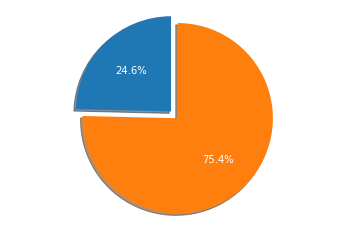

In [140]:
not_played_dict = dict((PD['parkinson'] == 0).value_counts())
labels = 'No Parkinson', 'Have Parkinson'
sizes = [not_played_dict[True], not_played_dict[False]]
explode = (0.1, 0)

ax = plt.pie(sizes, explode=explode, labels=labels,
    autopct='%1.1f%%', shadow=True, startangle=90, textprops={'color':'white'})

plt.axis('equal')
plt.show()

#### according the data we can see that their are more unhealthy people than healthy people

### Correlation matrix

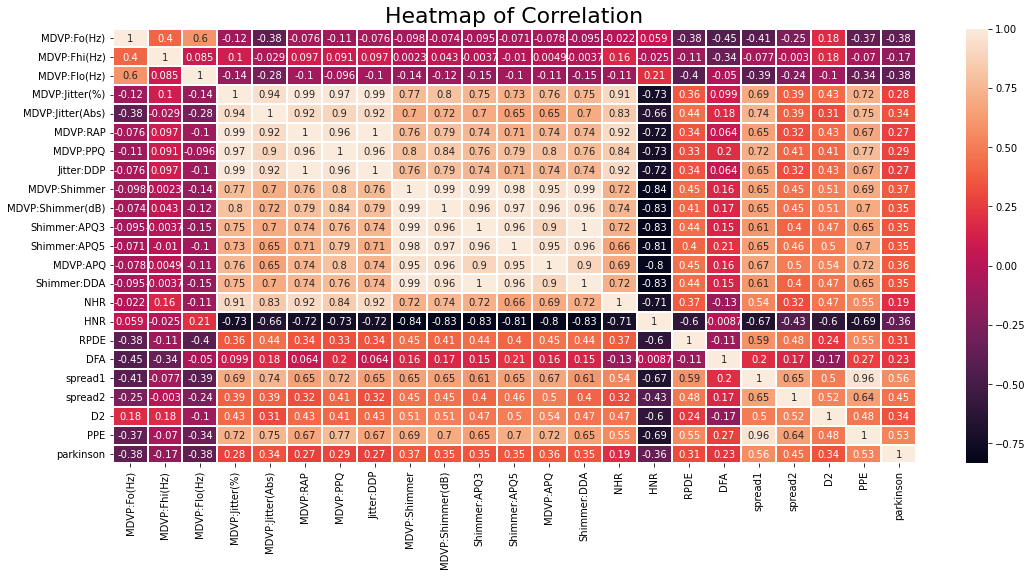

In [141]:
fig, ax = plt.subplots(figsize=(40,30))
corr = PD.corr()

sns.heatmap(corr, annot=True, linewidths=0.2)
ax.set_title("Heatmap of Correlation", fontsize = 22)
# set text size for labels on heatmap to 20
fig.set_size_inches(w=18, h= 8)
for text in ax.texts:
    text.set_size(10)

plt.show()

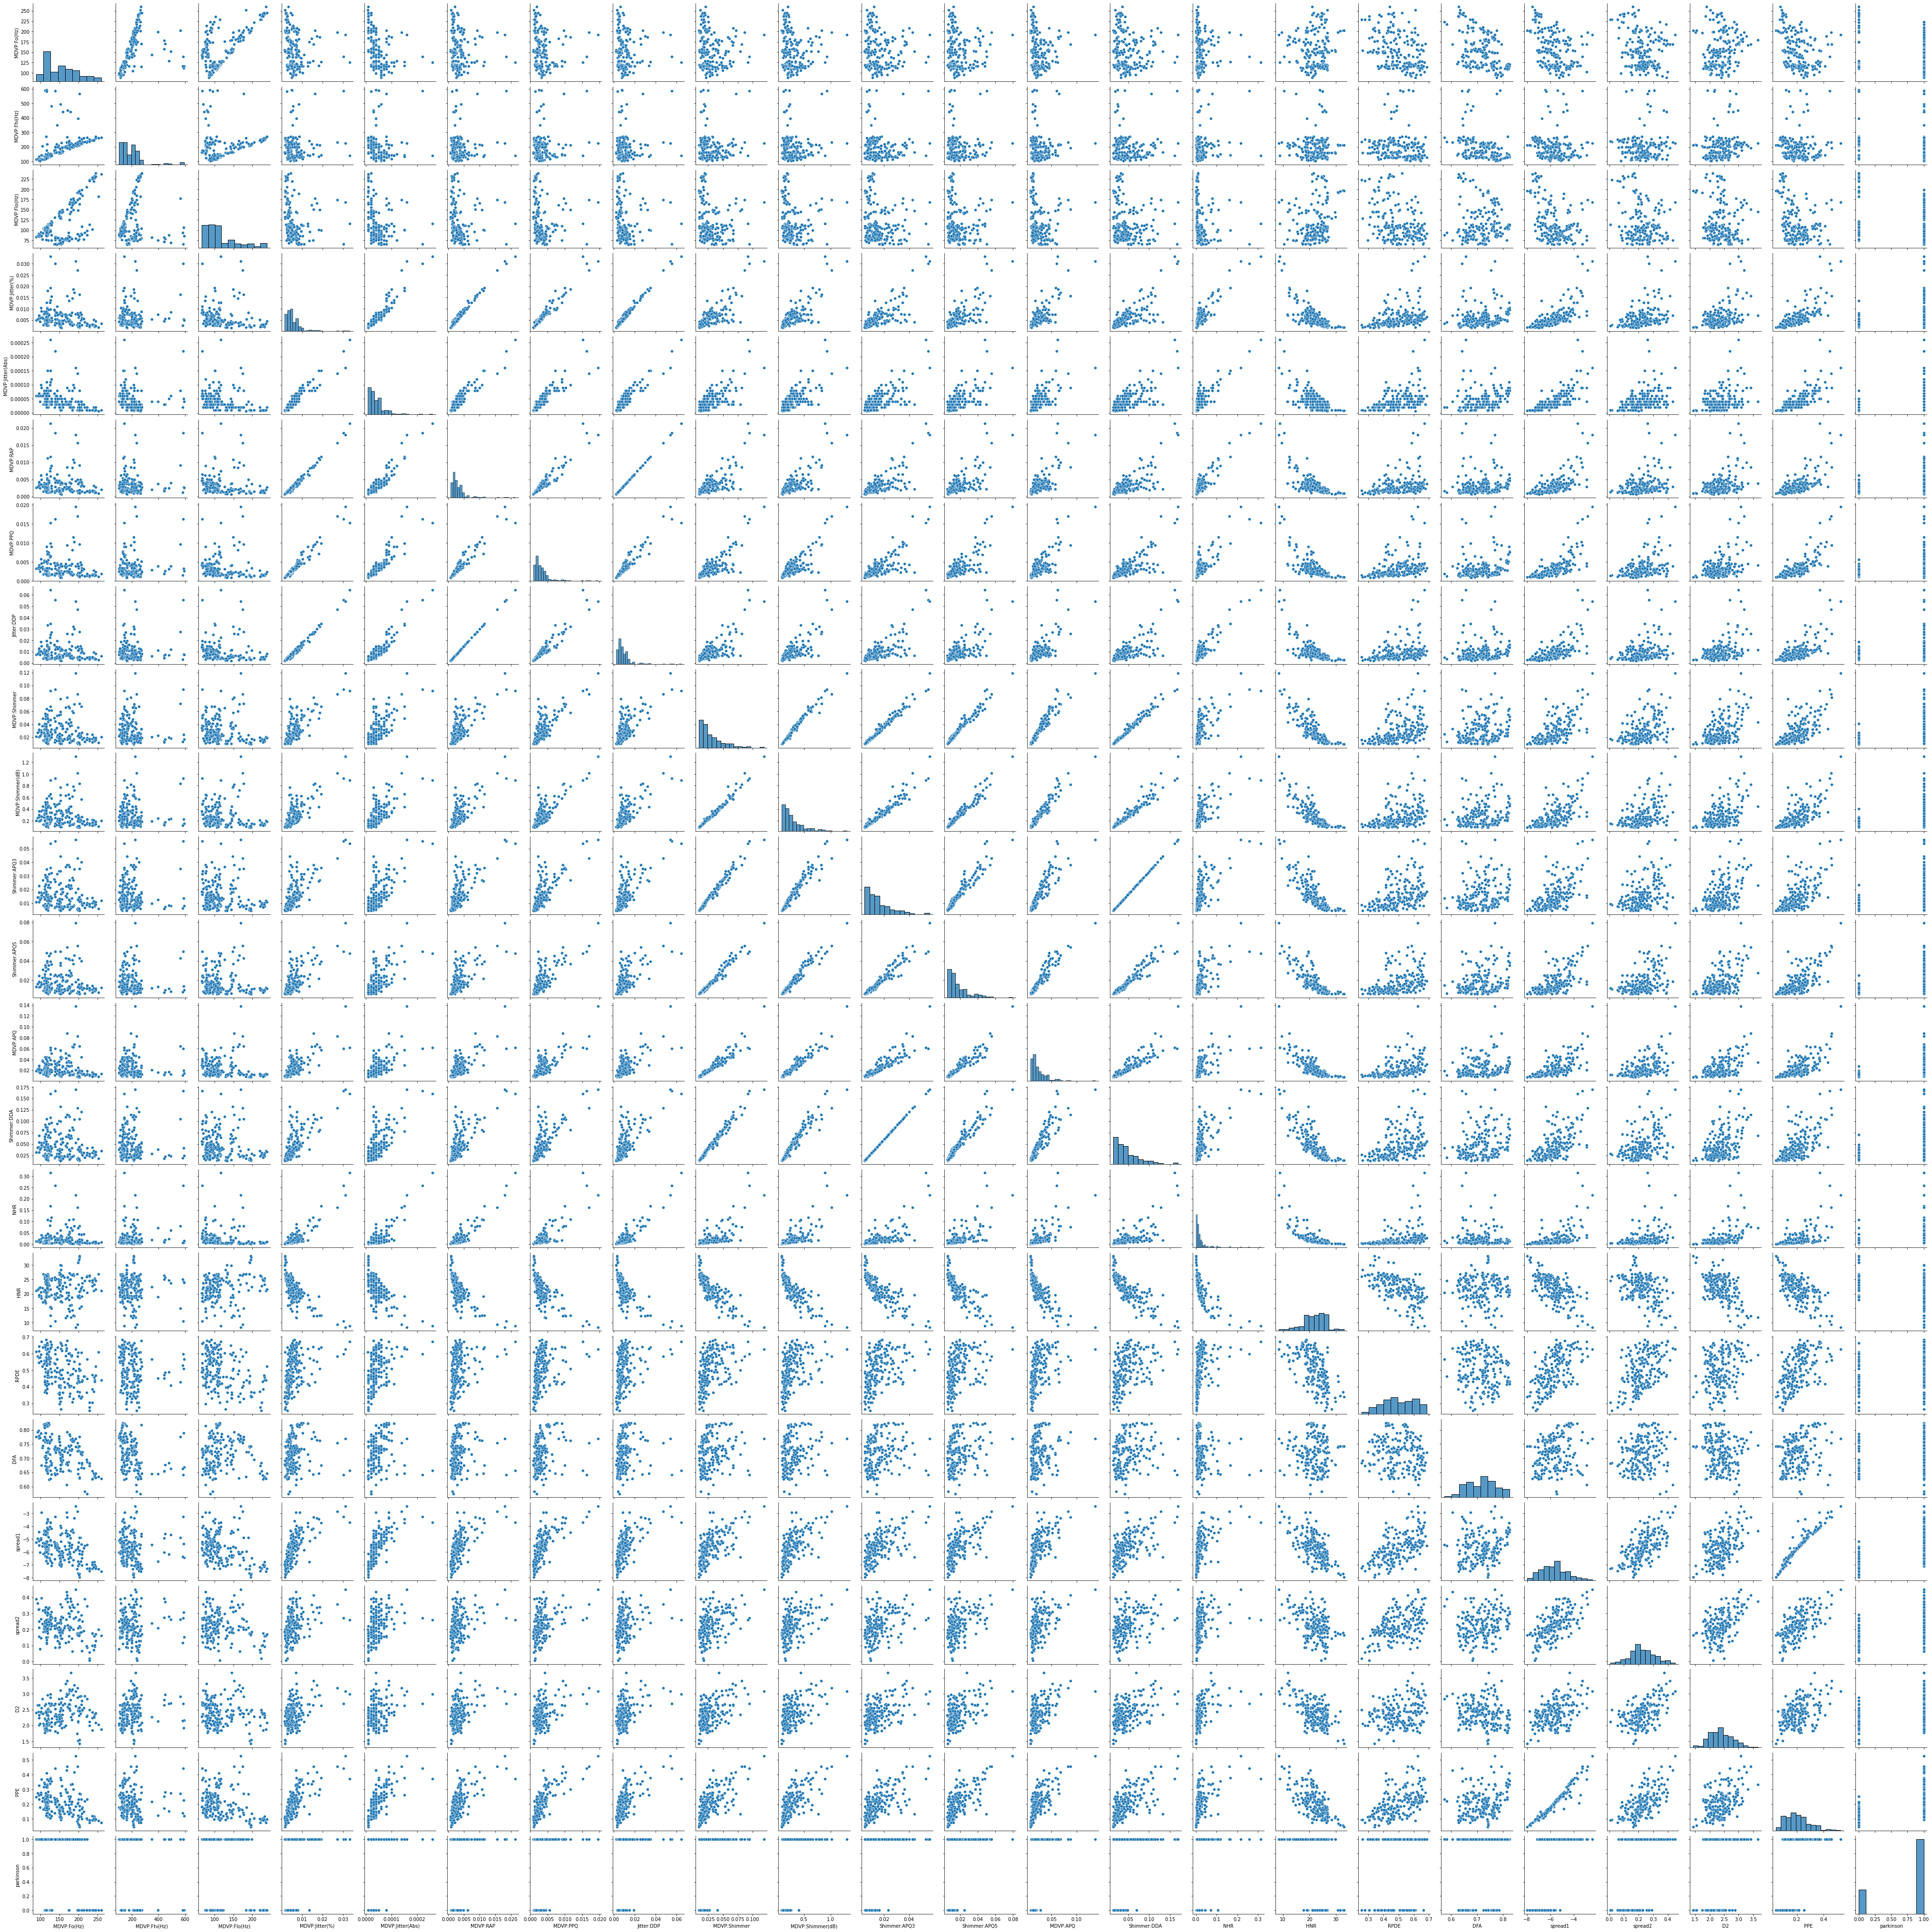

In [142]:
sns.pairplot(PD)

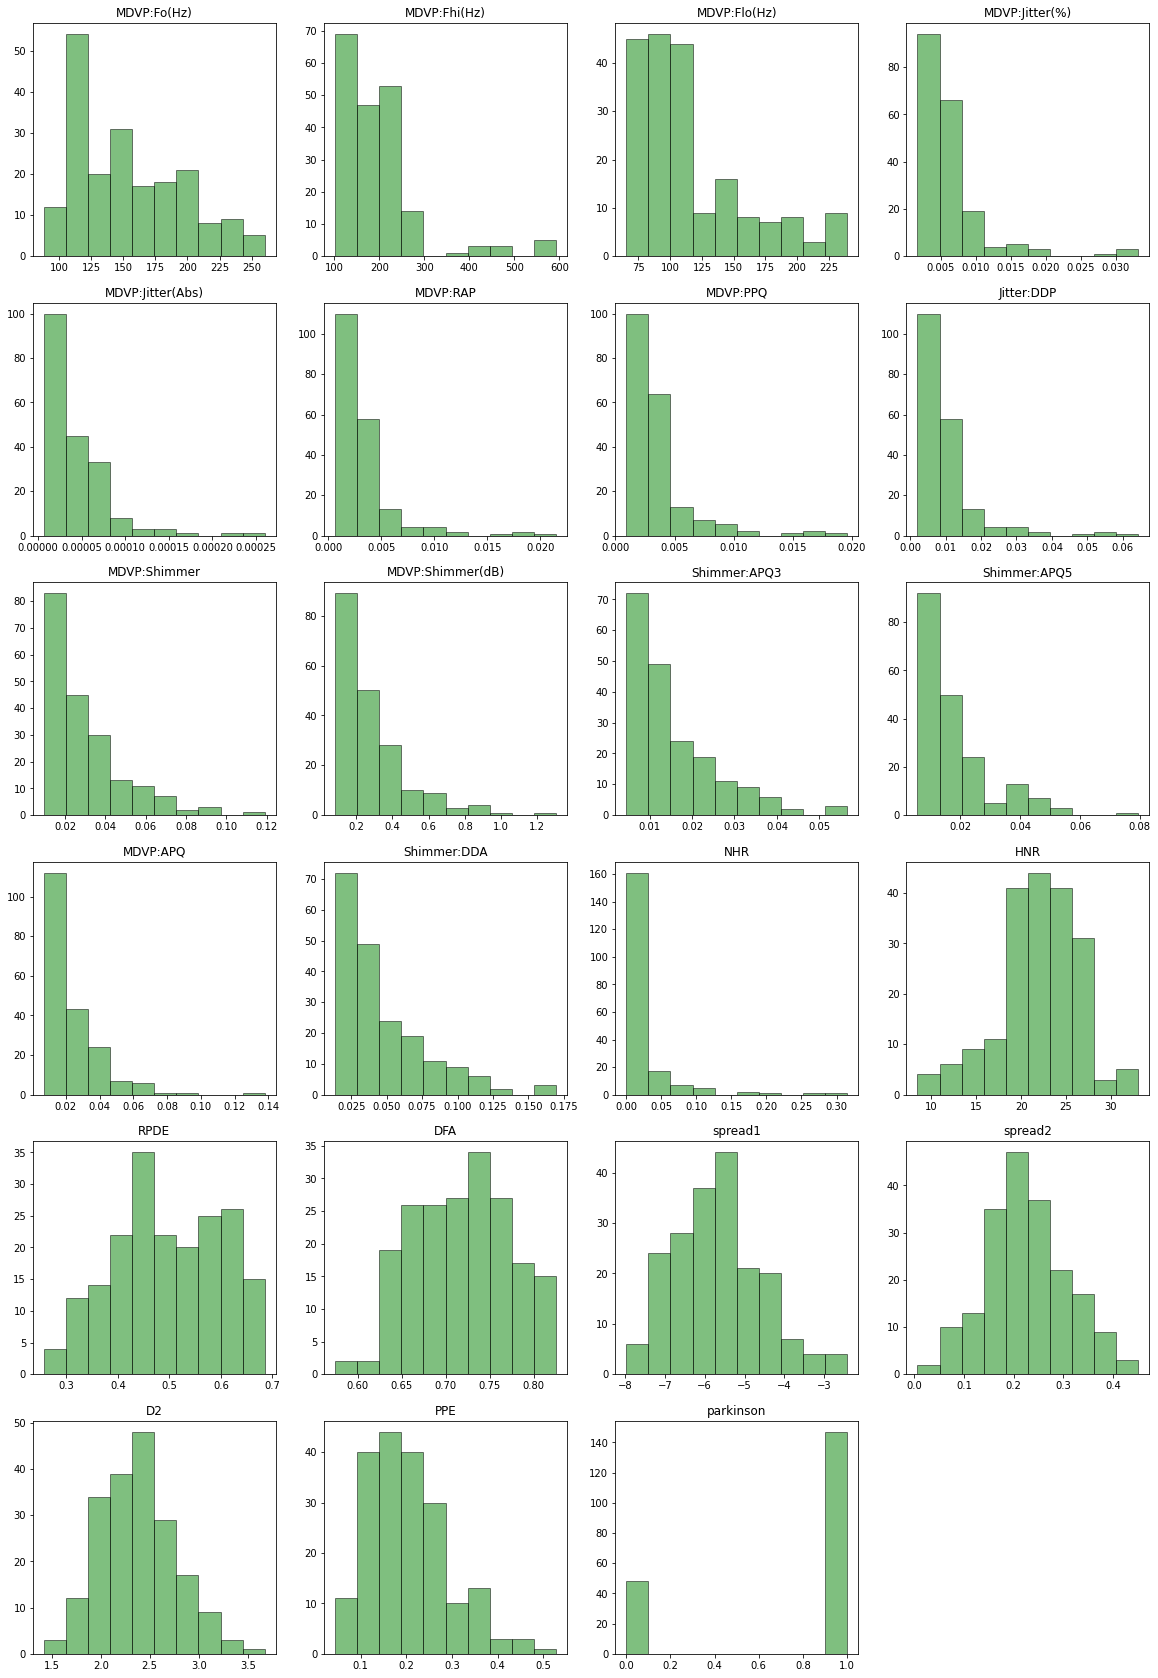

In [143]:
plt.figure(figsize=(20,30))
i = 1
for column in PD.columns:
    plt.subplot(6,4,i)
    plt.hist(PD[column], color='green', edgecolor = 'black', alpha = 1/2)
    plt.title(column)
    i += 1

del i

Some features have more deviation while some have less.

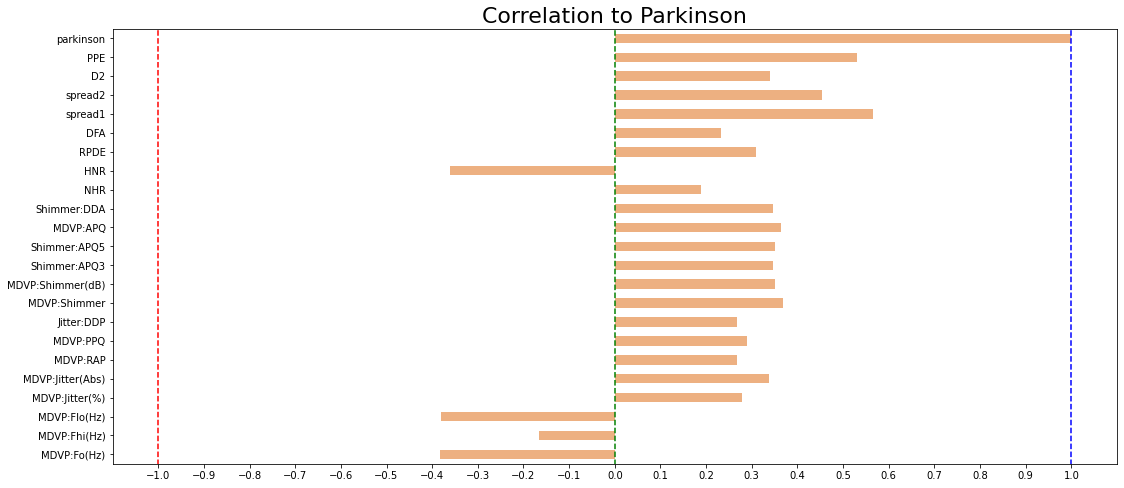

In [144]:
fig, ax = plt.subplots()
PD.corr()['parkinson'].plot(kind='barh',cmap='flare') # Correlation (to 'parkinson' label) figure.
ax.set_title("Correlation to Parkinson", fontsize = 22)
ax.set_xticks([i/10 for i in range(-10,11)])
fig.set_size_inches(w=18, h= 8)
plt.plot([-1,-1], [-1, 23], 'r--')
plt.plot([0,0], [-1, 23], 'g--')
plt.plot([1,1], [-1, 23], 'b--')

**Features are not at all highly or super low correlated or - Everything looks well balanced and will mostly contribute to our prediction**

### Splitting the data to X and Y

In [145]:
# Splitting into X (Feature Only Dataframe) and Y (Label Only Dataframe).
X = PD.drop('parkinson',axis=1)
Y = PD['parkinson']

In [146]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.23, random_state=420) # Train test split.

### Normalization

In [147]:
# Scaling the data using the MinMax Scaler.
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train) # Fit the X_train data on the scaler and scale it accordingly 
X_test = scaler.transform(X_test) # Scale the X_test data

In [148]:
[type(d) for d in [X_train, Y_train, X_test, Y_test]] # Check which data might be susceptible to incorrect indexing

[numpy.ndarray,
 pandas.core.series.Series,
 numpy.ndarray,
 pandas.core.series.Series]

In [149]:
# Fix indexing accordingly
Y_test.reset_index(drop=True, inplace=True)
Y_train.reset_index(drop=True, inplace=True)

# `do not touch or delete`

saving the X_test, Y_test and the scaler to mongoDB for future use

In [150]:
# def save_x_test_to_mongo(test_to_mongo):
#     import pymongo
#     import pickle
#     data=pickle.dumps(test_to_mongo)
#     client = pymongo.MongoClient("mongodb://localhost:27017/")
#     db = client["parkinson"]
#     collection = db["test_to_mongo"]
#     collection.insert_one({"data":data})

In [151]:
# test_to_mongo=(X_test,Y_test,scaler)
# save_x_test_to_mongo(test_to_mongo)

### `KNN Implementation`

In [22]:
def distance(p1,p2):
  p1 = np.array(p1)
  p2 = np.array(p2)
  return np.sqrt(np.sum((p1-p2)**2))

def predict(tps, xtrain, ytrain, k):
  ret = [] # Array containing prediction results
  for tp in tps: # For test point in test points array... 
    distances = [] # Array <==> [Distance from test point n to train point n, label of train point n]
    for n in range(len(xtrain)):
      d = (distance(tp,xtrain[n]),ytrain[n])
      distances.append(d)
    
    distances.sort() # Sort by distance

    zeros = 0
    ones = 0
    
    for i in range(k):
      if (distances[i][1] == 0):
        zeros += 1
      if (distances[i][1] == 1):
        ones += 1

    if (zeros > ones):
      ret.append(0)
    else:
      ret.append(1)

  return ret

In [23]:
k_accuracy_dict = {k : 1 - sum(Y_test != (predict(X_test, X_train, Y_train, k))) / len(Y_test) for k in range(1,64,2)} # Using Python 3 dictionary comprehension
print(k_accuracy_dict) # key = k ; value = accuracy --> k: accuracy
print("Best accuracy = ",max(k_accuracy_dict.values()))

{1: 0.8888888888888888, 3: 0.8888888888888888, 5: 0.9111111111111111, 7: 0.9111111111111111, 9: 0.9555555555555556, 11: 0.9555555555555556, 13: 0.8444444444444444, 15: 0.8888888888888888, 17: 0.8888888888888888, 19: 0.8888888888888888, 21: 0.8888888888888888, 23: 0.8888888888888888, 25: 0.8888888888888888, 27: 0.8888888888888888, 29: 0.8888888888888888, 31: 0.8888888888888888, 33: 0.8888888888888888, 35: 0.8888888888888888, 37: 0.8444444444444444, 39: 0.8666666666666667, 41: 0.8666666666666667, 43: 0.8444444444444444, 45: 0.8666666666666667, 47: 0.8222222222222222, 49: 0.8, 51: 0.7777777777777778, 53: 0.7777777777777778, 55: 0.7777777777777778, 57: 0.7777777777777778, 59: 0.7777777777777778, 61: 0.7777777777777778, 63: 0.7777777777777778}
Best accuracy =  0.9555555555555556


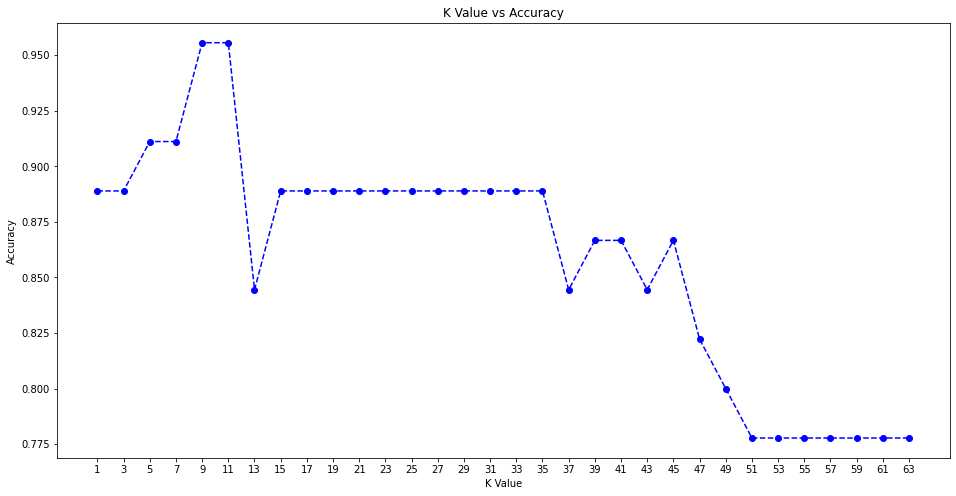

In [24]:
plt.figure(figsize=[16,8])
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title("K Value vs Accuracy")
plt.xticks(list(k_accuracy_dict.keys()))
plt.plot(list(k_accuracy_dict.keys()), list(k_accuracy_dict.values()), 'bo--')

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.97      0.97      0.97        35

    accuracy                           0.96        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.96      0.96      0.96        45



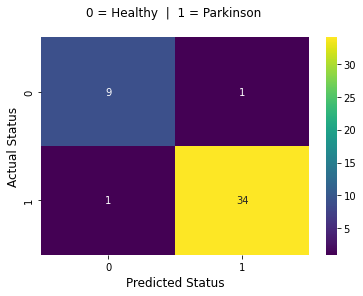

In [25]:
best_k = 9 # Our highest k
pred = predict(X_test, X_train, Y_train, best_k) # Predict the parkinson status of every person in X_test based on their features using our model.
mat = confusion_matrix(Y_test, pred) # Create confusion matrix based on predictions vs reality.
fig, ax = plt.subplots()
sns.heatmap(mat, cmap="viridis", annot=mat, ax = ax) # Plot heat map
plt.title("0 = Healthy  |  1 = Parkinson \n")
plt.xlabel("Predicted Status", fontsize = 12)
plt.ylabel("Actual Status", fontsize = 12)
print(classification_report(Y_test, pred))

In [26]:
list(X.columns)

['MDVP:Fo(Hz)',
 'MDVP:Fhi(Hz)',
 'MDVP:Flo(Hz)',
 'MDVP:Jitter(%)',
 'MDVP:Jitter(Abs)',
 'MDVP:RAP',
 'MDVP:PPQ',
 'Jitter:DDP',
 'MDVP:Shimmer',
 'MDVP:Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'MDVP:APQ',
 'Shimmer:DDA',
 'NHR',
 'HNR',
 'RPDE',
 'DFA',
 'spread1',
 'spread2',
 'D2',
 'PPE']

In [27]:
print(Y_test[1])
X_test[1] # Healthy

0


array([0.21100767, 0.05696031, 0.28199183, 0.08259212, 0.09090909,
       0.02697495, 0.03376206, 0.02713116, 0.06636845, 0.0566968 ,
       0.08903051, 0.03147897, 0.05214794, 0.08896041, 0.01241643,
       0.68184631, 0.65826063, 0.71690718, 0.24245376, 0.58235465,
       0.2511228 , 0.1543442 ])

Text(0, 0.5, 'Instances')

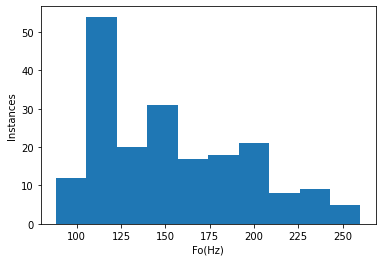

In [28]:
plt.hist(PD['MDVP:Fo(Hz)'])
plt.xlabel('Fo(Hz)')
plt.ylabel('Instances')

In [29]:
new_tp = PD.iloc[4] # Copy a point from original dataframe
# Change it's feature values:
new_tp.drop('parkinson',inplace=True) # Since we are going to change this test point's features, we cannot know it's label (whether has parkinson or not)

new_tp['MDVP:Fo(Hz)'] -= 8.2 # Change Fo : Fo is an opposite correlated feature, if it affects the new prediction it will do so that 1 (parkinson) will be predicted since we are reducing from said feature.

print("Original:",dict(PD.iloc[4].drop('parkinson')))
print("New TP:  ",dict(new_tp))

new_tp = scaler.transform([list(new_tp)])

print("\nOriginal: status = {0}".format(int(PD.iloc[4]['parkinson'])))
print("Original Prediction: status = {0} \n".format(predict([PD.iloc[4].drop('parkinson')], X_train, Y_train, best_k)[0])) # If on train and not test
print("New TP Prediction:", predict([new_tp], X_train, Y_train, best_k)[0])

Original: {'MDVP:Fo(Hz)': 116.014, 'MDVP:Fhi(Hz)': 141.781, 'MDVP:Flo(Hz)': 110.655, 'MDVP:Jitter(%)': 0.01284, 'MDVP:Jitter(Abs)': 0.00011, 'MDVP:RAP': 0.00655, 'MDVP:PPQ': 0.00908, 'Jitter:DDP': 0.01966, 'MDVP:Shimmer': 0.06425, 'MDVP:Shimmer(dB)': 0.584, 'Shimmer:APQ3': 0.0349, 'Shimmer:APQ5': 0.04825, 'MDVP:APQ': 0.04465, 'Shimmer:DDA': 0.1047, 'NHR': 0.01767, 'HNR': 19.649, 'RPDE': 0.417356, 'DFA': 0.823484, 'spread1': -3.747787, 'spread2': 0.234513, 'D2': 2.33218, 'PPE': 0.410335}
New TP:   {'MDVP:Fo(Hz)': 107.814, 'MDVP:Fhi(Hz)': 141.781, 'MDVP:Flo(Hz)': 110.655, 'MDVP:Jitter(%)': 0.01284, 'MDVP:Jitter(Abs)': 0.00011, 'MDVP:RAP': 0.00655, 'MDVP:PPQ': 0.00908, 'Jitter:DDP': 0.01966, 'MDVP:Shimmer': 0.06425, 'MDVP:Shimmer(dB)': 0.584, 'Shimmer:APQ3': 0.0349, 'Shimmer:APQ5': 0.04825, 'MDVP:APQ': 0.04465, 'Shimmer:DDA': 0.1047, 'NHR': 0.01767, 'HNR': 19.649, 'RPDE': 0.417356, 'DFA': 0.823484, 'spread1': -3.747787, 'spread2': 0.234513, 'D2': 2.33218, 'PPE': 0.410335}

Original: statu

Overall the prediction looks very promising and responds to changes accordingly

e.g: Here we reduced from the opposite correlated feature (Fo) and it responded to the change accordingly

## Building knn model for comparison with the the model above

##### Spliting the data into x and y 

In [30]:
# Splitting into X (Feature Only Dataframe) and Y (Label Only Dataframe).
X = PD.drop('parkinson',axis=1)
Y = PD['parkinson']

#### Spliting x and y into train and test

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.23, random_state=420) # Train test split.

#### Scaling the data using minmaxscaler

In [32]:
# Scaling the data using the MinMax Scaler.
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train) # Fit the X_train data on the scaler and scale it accordingly
X_test = scaler.transform(X_test) # Scale the X_test data


#### Checking for the incorrect indexing

In [33]:
# Check which data might be susceptible to incorrect indexing
[type(d) for d in [X_train, Y_train, X_test, Y_test]]

[numpy.ndarray,
 pandas.core.series.Series,
 numpy.ndarray,
 pandas.core.series.Series]

#### Correcting the indexing

In [34]:
# Fix indexing accordingly
Y_test.reset_index(drop=True, inplace=True)
Y_train.reset_index(drop=True, inplace=True)


#### Training `KNN` model

In [35]:
# train an new knn model
knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
knn_classifier.fit(X_train, Y_train)


KNeighborsClassifier(n_neighbors=9)

#### Predicting the test data

In [36]:
# predict the test set results
pred = knn_classifier.predict(X_test)
pred

array([1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1], dtype=int64)

#### Display the accuracy score

In [37]:
accuracy=knn_classifier.score(X_test, Y_test)
print("Accuracy:",accuracy)

Accuracy: 0.9555555555555556


### Visualize the results

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.97      0.97      0.97        35

    accuracy                           0.96        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.96      0.96      0.96        45



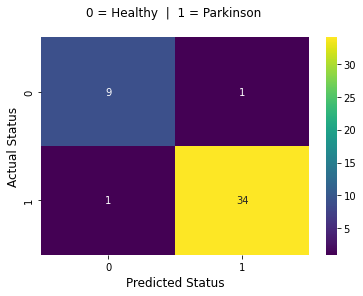

In [38]:
# Create confusion matrix based on predictions vs reality.
cmat = confusion_matrix(Y_test, pred)
fig, ax = plt.subplots()
sns.heatmap(cmat, cmap="viridis", annot=cmat, ax = ax)
plt.title("0 = Healthy  |  1 = Parkinson \n")
plt.xlabel("Predicted Status", fontsize = 12)
plt.ylabel("Actual Status", fontsize = 12)
print(classification_report(Y_test, pred))


#### `Another way` to calculate the classification score

In [39]:
from sklearn import metrics
print('Confusion matrix:\n', cmat)
print('\nTrue Positives(TP) = ', cmat[0,0])
print('True Negatives(TN) = ', cmat[1,1])
print('False Positives(FP) = ', cmat[0,1])
print('False Negatives(FN) = ', cmat[1,0],end='\n\n')

TP = cmat[0,0]
TN = cmat[1,1]
FP = cmat[0,1]
FN = cmat[1,0]
classification_accuracy =(TP + TN) / float(TP + TN + FP + FN)
classification_error =(FP + FN) / float(TP + TN + FP + FN)
precision = TP / float(TP + FP)
recall = TP / float(TP + FN)
f1score=metrics.f1_score(Y_test, pred)

print(f'classification_accuracy = {classification_accuracy}')
print(f'classification_error = {classification_error}')
print(f'precision = {precision}')
print(f'recall = {recall}')
print(f'f1score = {f1score}')

Confusion matrix:
 [[ 9  1]
 [ 1 34]]

True Positives(TP) =  9
True Negatives(TN) =  34
False Positives(FP) =  1
False Negatives(FN) =  1

classification_accuracy = 0.9555555555555556
classification_error = 0.044444444444444446
precision = 0.9
recall = 0.9
f1score = 0.9714285714285714


### Comparing the accuracy score of the model with the model above

In [40]:
if accuracy==max(k_accuracy_dict.values()):
    print(f'The accuracies of both the models are equal.')

The accuracies of both the models are equal.


### Preforming K-Fold cross validation on the model

In [41]:
# preforming the k fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=knn_classifier, X=X_train, y=Y_train, cv=10)
accuracies.mean()
accuracies.std()

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))  #<-------------------mean
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))#<------------------std
accuracies


Accuracy: 90.67 %
Standard Deviation: 6.11 %


array([1.        , 0.86666667, 0.8       , 1.        , 0.86666667,
       0.93333333, 0.86666667, 0.86666667, 0.93333333, 0.93333333])

#### As we can see the accuracy score is high enough to be used for the prediction and the std is not too high

## Applying Grid Search to find the best model and the best parameters

In [42]:
# preforming grid search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'n_neighbors': [1,3,5,7,9,11,13,15,17],'p':[1,2], 'weights':['uniform','distance'], 'algorithm':['auto','ball_tree','kd_tree','brute'],}]    
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=parameters, scoring='accuracy', cv=10)
grid_search = grid_search.fit(X_train, Y_train)
best_parameters_knn2 = grid_search.best_params_
best_accuracy_knn2 = grid_search.best_score_
print('Best Accuracy:', best_accuracy_knn2)
print('Best Parameters:', best_parameters_knn2)


Best Accuracy: 0.9666666666666668
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}


### Confusion matrix for the optimized model

Text(33.0, 0.5, 'Actual Status')

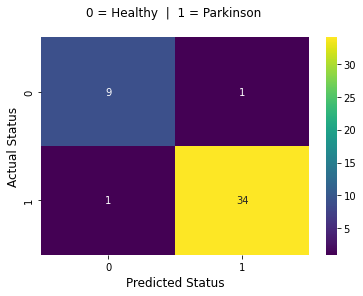

In [43]:
cmat_optimized=confusion_matrix(Y_test, pred)
fig, ax = plt.subplots()
sns.heatmap(cmat_optimized, cmap="viridis", annot=cmat_optimized, ax = ax)
plt.title("0 = Healthy  |  1 = Parkinson \n")
plt.xlabel("Predicted Status", fontsize = 12)
plt.ylabel("Actual Status", fontsize = 12)


### `Checking for overfitting in the model`


In [44]:
#Check for overfitting and underfitting Achieved by evaluating the scores on training and test set
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score

y_pred_train = knn_classifier.predict(X_train)
print('Training-set accuracy score:{0:0.4f}'. format(accuracy_score(Y_train, y_pred_train) ))

y_pred_test = knn_classifier.predict(X_test)
print('testing-set accuracy score:{0:0.4f}'. format(accuracy_score(Y_test, y_pred_test) ))


print('Training set score: {:.4f}'.format(knn_classifier.score(X_train, Y_train) ))
print('Test set score: {:.4f}'.format(knn_classifier.score(X_test, Y_test) ))

diffrence=abs(knn_classifier.score(X_test, Y_test)-knn_classifier.score(X_train, Y_train))
diffrence


Training-set accuracy score:0.9333
testing-set accuracy score:0.9556
Training set score: 0.9333
Test set score: 0.9556


0.022222222222222254

### `As we can see model is not overfitting`

### After the model is optimized we can save it to Mongo DB

In [45]:
# Offload the model to mongo db
import pymongo
import pickle

def save_model_to_db(model, client, db, dbconnection, model_name,accuracy,parameters):
    pickled_model = pickle.dumps(model)
    myclient = pymongo.MongoClient(client)
    mydb = myclient[db]
    mycon = mydb[dbconnection]
    
    if mycon.count_documents({'model_name':model_name}) == 0:
        mycon.insert_one({'model':pickled_model,"accuracy":accuracy,"parameters":parameters,"model_name":model_name,"dbconnection":dbconnection,'model':pickled_model})
    else:
        if mycon.find_one({'model_name':model_name})['accuracy'] < accuracy:
            mycon.update_one({'model_name':model_name},{'$set':{'accuracy':accuracy,'parameters':parameters,'model_name':model_name,'dbconnection':dbconnection,'model':pickled_model}})
    
    print("saved",model_name,accuracy)

In [46]:
save_model_to_db(knn_classifier, "mongodb://localhost:27017", "parkinson_models", "knn", "KNN_model_2", best_accuracy_knn2, best_parameters_knn2)

saved KNN_model_2 0.9666666666666668


# Create SVM Model for the data set

In [47]:
# build svm model
from sklearn.svm import SVC
svm_classifier = SVC(kernel='rbf', random_state=0)
svm_classifier.fit(X_train, Y_train)


SVC(random_state=0)

### Predicting the test data

In [48]:
# predict the test set results
pred = svm_classifier.predict(X_test)
pred


array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1], dtype=int64)

### Display the accuracy score

              precision    recall  f1-score   support

           0       1.00      0.50      0.67        10
           1       0.88      1.00      0.93        35

    accuracy                           0.89        45
   macro avg       0.94      0.75      0.80        45
weighted avg       0.90      0.89      0.87        45



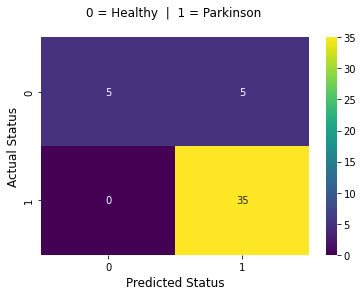

In [49]:
# Create confusion matrix based on predictions vs reality.
mat = confusion_matrix(Y_test, pred)
fig, ax = plt.subplots()
sns.heatmap(mat, cmap="viridis", annot=mat, ax = ax)
plt.title("0 = Healthy  |  1 = Parkinson \n")
plt.xlabel("Predicted Status", fontsize = 12)
plt.ylabel("Actual Status", fontsize = 12)
print(classification_report(Y_test, pred))

In [50]:
prediction_accuracy=svm_classifier.score(X_test, Y_test)
print("Accuracy: {:.2f} %".format(prediction_accuracy*100))  #<-------------------mean
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))#<------------------std
prediction_accuracy

Accuracy: 88.89 %
Standard Deviation: 6.11 %


0.8888888888888888

## ROC Curve for the model

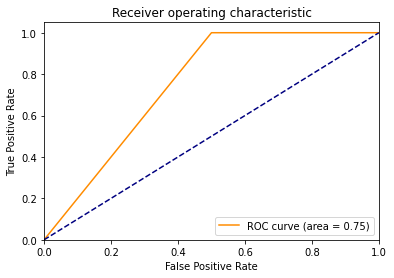

In [51]:
# create roc curve plot
from sklearn.metrics import roc_curve, auc
fig, ax = plt.subplots()
fpr, tpr, thresholds = roc_curve(Y_test, pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


### The ROC plot summarizes all of confusion matrices that each threshold produced.

#### Preforming K-Fold cross validation on the model

In [52]:
# aply k fold cross validation to the svm model
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=svm_classifier, X=X_train, y=Y_train, cv=10)
accuracies.mean()
accuracies.std()
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))  #<-------------------mean
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))#<------------------std
accuracies


Accuracy: 86.67 %
Standard Deviation: 5.16 %


array([0.93333333, 0.86666667, 0.8       , 0.86666667, 0.8       ,
       0.86666667, 0.86666667, 0.8       , 0.93333333, 0.93333333])

#### As we can see the accuracy score is high enough to be used for the prediction and the std is not too high

### And now for optimizing the model accuracy score and the model parameters using Grid Search

In [53]:
# preforming grid search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.25,0.5,0.75,1,10,100,1000], 'kernel': ['linear']},
                {'C': [0.25,0.5,0.75,1,10,100,1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=parameters, scoring='accuracy', cv=10, n_jobs=-1)
grid_search = grid_search.fit(X_train, Y_train)
best_parameters_svm = grid_search.best_params_
best_accuracy_svm = grid_search.best_score_
print('Best Accuracy:', best_accuracy_svm)
print('Best Parameters:', best_parameters_svm)


Best Accuracy: 0.9333333333333333
Best Parameters: {'C': 100, 'gamma': 0.9, 'kernel': 'rbf'}


### `Checking for overfitting in the model`

In [54]:
y_pred_train = svm_classifier.predict(X_train)
print('Training-set accuracy score:{0:0.4f}'. format(accuracy_score(Y_train, y_pred_train) ))

y_pred_test = svm_classifier.predict(X_test)
print('testing-set accuracy score:{0:0.4f}'. format(accuracy_score(Y_test, y_pred_test) ))


print('Training set score: {:.4f}'.format(svm_classifier.score(X_train, Y_train) ))
print('Test set score: {:.4f}'.format(svm_classifier.score(X_test, Y_test) ))

diffrence=abs(svm_classifier.score(X_test, Y_test)-svm_classifier.score(X_train, Y_train))
diffrence


Training-set accuracy score:0.8933
testing-set accuracy score:0.8889
Training set score: 0.8933
Test set score: 0.8889


0.004444444444444473

### `As we can see model is not overfitting nor underfitting`

### After the model is optimized we can save it to mongo db

In [55]:
save_model_to_db(svm_classifier, client="mongodb://localhost:27017", db="parkinson_models", dbconnection="svm", model_name="SVM_model", accuracy=best_accuracy_svm, parameters=best_parameters_svm)

saved SVM_model 0.9333333333333333


In [56]:
# creating a dict of c parameters and their accuracies # key = C ; value = accuracy --> C: accuracy
C_accuracy_dict = {}
for i in range(len(grid_search.cv_results_['params'])):
    C_accuracy_dict[grid_search.cv_results_['params'][i]['C']] = grid_search.cv_results_['mean_test_score'][i]
C_accuracy_dict


{0.25: 0.8266666666666668,
 0.5: 0.8666666666666668,
 0.75: 0.8666666666666668,
 1: 0.8733333333333334,
 10: 0.8866666666666667,
 100: 0.9333333333333333,
 1000: 0.9333333333333333}

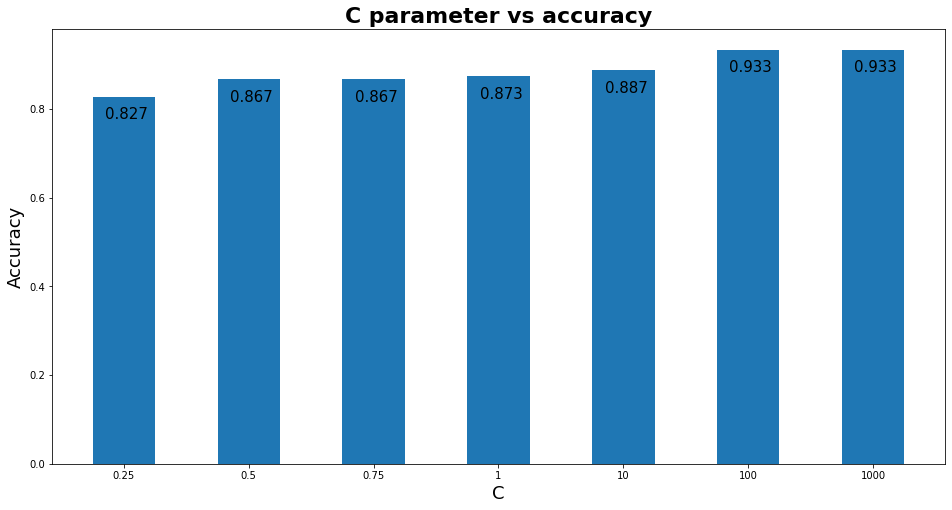

In [57]:
plt.figure(figsize=[16,8])
plt.bar(range(len(C_accuracy_dict)), list(C_accuracy_dict.values()), align='center',width=0.5)
plt.xticks(range(len(C_accuracy_dict)), list(C_accuracy_dict.keys()))
plt.title('C parameter vs accuracy', fontsize=22, fontweight='bold')
plt.ylabel('Accuracy', fontsize=18)
plt.xlabel('C', fontsize=18)

for i, v in enumerate(list(C_accuracy_dict.values())):
    plt.text(i-0.15, v-0.05, str(v.round(3)), fontsize=15)
plt.show()

### As we can see from the graph above the best parameter for c 100 is the best parameter for the model

# Random Forest Model

In [58]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier()

#### Predicting the test data

In [59]:
y_pred_rf = rf_classifier.predict(X_test)
y_pred_rf

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1], dtype=int64)

#### Display the accuracy score

In [60]:
accuracy = rf_classifier.score(X_test, Y_test)
print("Accuracy:",accuracy)

Accuracy: 0.9111111111111111


### Visualize the results

              precision    recall  f1-score   support

           0       1.00      0.50      0.67        10
           1       0.88      1.00      0.93        35

    accuracy                           0.89        45
   macro avg       0.94      0.75      0.80        45
weighted avg       0.90      0.89      0.87        45



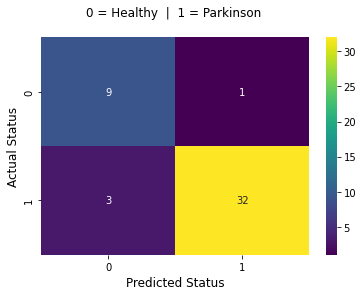

In [61]:
# Create confusion matrix based on predictions vs reality.
cmat = confusion_matrix(Y_test, y_pred_rf)
fig, ax = plt.subplots()
sns.heatmap(cmat, cmap="viridis", annot=cmat, ax = ax)
plt.title("0 = Healthy  |  1 = Parkinson \n")
plt.xlabel("Predicted Status", fontsize = 12)
plt.ylabel("Actual Status", fontsize = 12)
print(classification_report(Y_test, pred))


#### `Another way` to calculate the classification score

In [62]:
from sklearn import metrics
print('Confusion matrix:\n', cmat)
print('\nTrue Positives(TP) = ', cmat[0,0])
print('True Negatives(TN) = ', cmat[1,1])
print('False Positives(FP) = ', cmat[0,1])
print('False Negatives(FN) = ', cmat[1,0],end='\n\n')

TP = cmat[0,0]
TN = cmat[1,1]
FP = cmat[0,1]
FN = cmat[1,0]
classification_accuracy =(TP + TN) / float(TP + TN + FP + FN)
classification_error =(FP + FN) / float(TP + TN + FP + FN)
precision = TP / float(TP + FP)
recall = TP / float(TP + FN)
f1score=metrics.f1_score(Y_test, pred)

print(f'classification_accuracy = {classification_accuracy}')
print(f'classification_error = {classification_error}')
print(f'precision = {precision}')
print(f'recall = {recall}')
print(f'f1score = {f1score}')

Confusion matrix:
 [[ 9  1]
 [ 3 32]]

True Positives(TP) =  9
True Negatives(TN) =  32
False Positives(FP) =  1
False Negatives(FN) =  3

classification_accuracy = 0.9111111111111111
classification_error = 0.08888888888888889
precision = 0.9
recall = 0.75
f1score = 0.9333333333333333


### Preforming K-Fold cross validation on the model

In [63]:
# preforming the k fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=rf_classifier, X=X_train, y=Y_train, cv=10)
accuracies.mean()
accuracies.std()

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))  #<-------------------mean
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))#<------------------std
accuracies


Accuracy: 91.33 %
Standard Deviation: 8.46 %


array([0.93333333, 0.93333333, 0.93333333, 1.        , 0.86666667,
       0.8       , 0.93333333, 0.73333333, 1.        , 1.        ])

#### As we can see the accuracy score is high enough to be used for the prediction and the std is not too high

## Applying Grid Search to find the best model and the best parameters

In [64]:
# preforming grid search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [10,20,30,40,50,60,70,80,90,100], 'max_features': [2,3,4,5,6,7,8,9,10], 'max_depth': [2,3,4,5,6,7,8,9,10]}]
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=parameters, scoring='accuracy', cv=10)
grid_search = grid_search.fit(X_train, Y_train)
best_parameters_rf = grid_search.best_params_
best_accuracy_rf = grid_search.best_score_
print('Best Accuracy:', best_accuracy_rf)
print('Best Parameters:', best_parameters_rf)


Best Accuracy: 0.9466666666666667
Best Parameters: {'max_depth': 10, 'max_features': 7, 'n_estimators': 20}


### Confusion matrix for the optimized model

              precision    recall  f1-score   support

           0       1.00      0.50      0.67        10
           1       0.88      1.00      0.93        35

    accuracy                           0.89        45
   macro avg       0.94      0.75      0.80        45
weighted avg       0.90      0.89      0.87        45



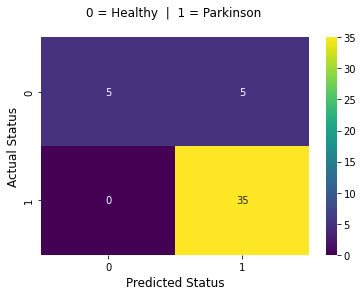

In [65]:
cmat_optimized=confusion_matrix(Y_test, pred)
fig, ax = plt.subplots()
sns.heatmap(cmat_optimized, cmap="viridis", annot=cmat_optimized, ax = ax)
plt.title("0 = Healthy  |  1 = Parkinson \n")
plt.xlabel("Predicted Status", fontsize = 12)
plt.ylabel("Actual Status", fontsize = 12)
print(classification_report(Y_test, pred))

### `Checking for overfitting in the model`

In [66]:
#Check for overfitting and underfitting Achieved by evaluating the scores on training and test set
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score

y_pred_train = rf_classifier.predict(X_train)
print('Training-set accuracy score:{0:0.4f}'. format(accuracy_score(Y_train, y_pred_train) ))

y_pred_test = rf_classifier.predict(X_test)
print('testing-set accuracy score:{0:0.4f}'. format(accuracy_score(Y_test, y_pred_test) ))


print('Training set score: {:.4f}'.format(rf_classifier.score(X_train, Y_train) ))
print('Test set score: {:.4f}'.format(rf_classifier.score(X_test, Y_test) ))

diffrence=abs(rf_classifier.score(X_test, Y_test)-rf_classifier.score(X_train, Y_train))
diffrence


Training-set accuracy score:1.0000
testing-set accuracy score:0.9111
Training set score: 1.0000
Test set score: 0.9111


0.0888888888888889

### `As we can see model is not overfitting`

### After the model is optimized we can save it to Mongo DB

In [67]:
save_model_to_db(rf_classifier, "mongodb://localhost:27017", "parkinson_models", "rf", "RF_model_1", best_accuracy_rf, best_parameters_rf)

saved RF_model_1 0.9466666666666667


# Now after we trained and optimized the knn model and the SVM Model we will compare the accuracy score of the models and the parameters of the models

In [68]:
print(f'Best Accuracy knn model: {best_accuracy_knn2}')
print(f'Best Accuracy svm model: {best_accuracy_svm}')
print(f'Best Accuracy rf model: {best_accuracy_rf}')

Best Accuracy knn model: 0.9666666666666668
Best Accuracy svm model: 0.9333333333333333
Best Accuracy rf model: 0.9466666666666667


# The conclution is that the KNN Model is the model with the higher prediction accuracy score 